# Text Visualization | BAIS:6100

**Instructor: Qihang Lin**

Text visualization is mainly achieved through the use of graph, chart, word cloud, map, network, timeline, etc. It is these visualized results that make it possible for humans to read the most important aspects of a huge amount of information.

**CreditCardComplaints.csv** contains customers' complains about the credit card services of Wells Fargo and Captical One.  

Our goal is to compare the complaints on Wells Fargo and Captical One based on term frequencies.

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("classdata/CreditCardComplaints.csv")
df.head()

,Company,Consumer.complaint.narrative
0,Wells Fargo & Company,I had been problem with well Fargo Bank I 'm h...
1,Wells Fargo & Company,Complaint Against : Wells Fargo Financial Nati...
2,Wells Fargo & Company,I wanted to know what interest rate might be t...
3,Wells Fargo & Company,Approximately two years ago I opened up a secu...
4,Wells Fargo & Company,"Wells Fargo informed me that they made a "" bus..."


In [2]:
df.Company.value_counts()

Capital One              1604
Wells Fargo & Company     543
Name: Company, dtype: int64

Be careful that the two companies are not evently represented in this data set. It may be unfair to directly compare the total term frequencies. Normalization of the term frequencies may be needed.

We clean the raw text a little bit before visualization. 

In [3]:
df['Consumer.complaint.narrative'][1]

'Complaint Against : Wells Fargo Financial National BankI was charged a {$25.00} late fee on a {$500.00} remaining balance for paying {$120.00} well ahead of the due date but not covering the full " minimum \'\' payment of approximately {$190.00}. When I explained the details of the situation, they did not acknowledge the best effort I made to be current and refused to waive the fees since in their determination it was not a Wells Fargo Error. The fee is unfair, and their choice to not waive the fee was a horrible busines practice and abusive in nature as it rested on " There is no beneift to us having to waive the fee \'\' Bankground Details : In XX/XX/XXXX I purchased a hot tup and took advantage of a dealer finance option that used a Wells Fargo Outdoor Solution credit card to provide XXXX months interest free financing. The total amount financed was approximately {$5500.00}. On XXXX I paid XXXX, on XX/XX/XXXX I paid {$2500.00} and knew there was a {$500.00} remaining balance. Given

In [4]:
#Replace all dollar amounts by a group token.
df['Consumer.complaint.narrative']=[re.sub("\{\$[\d,\.]*\.\d+\}", "moneytoken", s) for s in df['Consumer.complaint.narrative']]

In [5]:
#Remove all masks like "XXXX"
df['Consumer.complaint.narrative']=[re.sub("X+", " ", s) for s in df['Consumer.complaint.narrative']]

# Frequency Bar Chart

To make the visualization more unstandable for a broad audience, we choose not to do stemming and tokenize texts into bigrams.

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk  
nltk_stopwords = nltk.corpus.stopwords.words("english") 
nltk_stopwords=nltk_stopwords+["wells","fargo","capital","one"]
vectorizer = CountVectorizer(stop_words=nltk_stopwords,ngram_range=(2,2))

Create the DTM for the complaints on each company and calculate the total term frequencies for each company separately.

In [7]:
DTM1 =vectorizer.fit_transform(df[df.Company=="Capital One"]["Consumer.complaint.narrative"])
dffreq1 = pd.DataFrame({'Term': vectorizer.get_feature_names_out(),
                   'Frequency': DTM1.sum(axis=0).tolist()[0]
                  })
dffreq1.sort_values(by="Frequency",inplace=True,ascending=False)
dffreq1.reset_index(inplace=True,drop=True)
#We drop the most frequent term "credit card", since we know all complaints are about credit card 
dffreq1.drop(0,axis=0,inplace=True)  
dffreq1.reset_index(drop=True,inplace=True)
dffreq1.head()

,Term,Frequency
0,credit report,361
1,customer service,206
2,credit cards,174
3,credit score,154
4,late payment,153


In [8]:
DTM2 =vectorizer.fit_transform(df[df.Company=="Wells Fargo & Company"]["Consumer.complaint.narrative"])
dffreq2 = pd.DataFrame({'Term': vectorizer.get_feature_names_out(),
                   'Frequency': DTM2.sum(axis=0).tolist()[0]
                  })
dffreq2.sort_values(by="Frequency",inplace=True,ascending=False)
dffreq2.reset_index(inplace=True,drop=True)
#We drop the most frequent term "credit card", since we know all complaints are about credit card 
dffreq2.drop(0,axis=0,inplace=True)  
dffreq2.reset_index(drop=True,inplace=True)
dffreq2.head()

,Term,Frequency
0,customer service,89
1,credit report,84
2,balance transfer,84
3,checking account,77
4,card account,76


To compare the term frequencies from the two companies, we need to merge the two frequency tables into one. Then create a bar chart using the same X-axis for both companies. 

Since the data is not evently splitted between the two companies. We normalize the frequencies by dividing them by the total number of words across all complaints on each company.

In [9]:
dfall = pd.merge(dffreq1, dffreq2, on="Term")
dfall['Frequency_x']=dfall['Frequency_x']/dfall['Frequency_x'].sum()
dfall['Frequency_y']=dfall['Frequency_y']/dfall['Frequency_y'].sum()
dfall.sort_values(by="Frequency_x",ascending=False,inplace=True)
dfall.reset_index(drop=True,inplace=True)
dfall.head()

,Term,Frequency_x,Frequency_y
0,credit report,0.009096,0.004086
1,customer service,0.005190,0.004329
2,credit cards,0.004384,0.002238
3,credit score,0.003880,0.002384
4,late payment,0.003855,0.001265


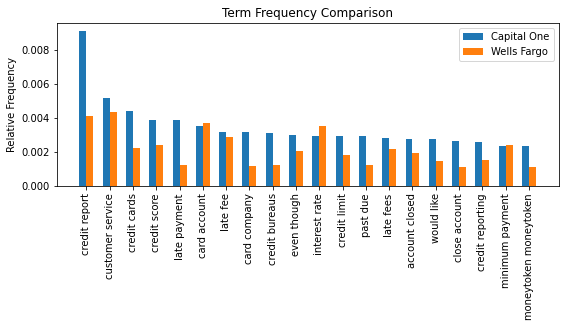

In [10]:
import numpy as np
top = 20
x = np.arange(top)  # the x ticks (terms) locations
width = 0.3         # the width of the bars

plt.rcParams['figure.figsize'] = [9, 3] #This sets the size of the plot.
fig, ax = plt.subplots()
ax.bar(x - width/2, dfall.Frequency_x[0:top], width, label='Capital One')
ax.bar(x + width/2, dfall.Frequency_y[0:top], width, label='Wells Fargo')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Relative Frequency')
ax.set_title('Term Frequency Comparison')
ax.set_xticks(x)
ax.set_xticklabels(dfall.Term[0:top])
ax.legend()
plt.xticks(rotation=90)
plt.rc('font', size=15)          # controls default text sizes
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=15)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('legend', fontsize=15)    # legend fontsize
plt.rc('figure', titlesize=15)   # fontsize of the figure title
plt.show()

Additional methods of **ax**: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axes.html

Additional methods of **plt**: https://matplotlib.org/stable/api/pyplot_summary.html

# Scatter Plot Based on Frequency

We can plot each term in a 2D graph with text annotation using their frequencies in the two companies as coordinates.

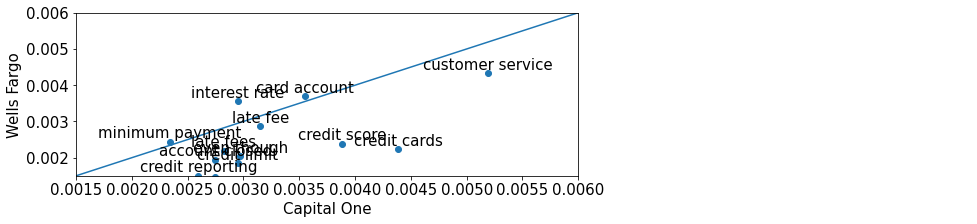

In [11]:
top = 20
plt.scatter(dfall.Frequency_x[0:top],dfall.Frequency_y[0:top])  #Scatter plot
for i in range(0,top):
    plt.annotate(dfall.Term[i],          # this is the text
             (dfall.Frequency_x[i],dfall.Frequency_y[i]), # this is the data point to label
             textcoords="offset points", # how to position the text
             xytext=(0,4),               # distance from text to points (x,y)
             ha='center')                # horizontal alignment can be left, right or center
plt.plot([0,0.006], [0,0.006], label='linear')
plt.xlim(0.0015,  0.006)
plt.ylim(0.0015,  0.006)
plt.xlabel('Capital One')
plt.ylabel('Wells Fargo')
plt.rc('font', size=15)          # controls default text sizes
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=15)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('legend', fontsize=15)    # legend fontsize
plt.rc('figure', titlesize=15)   # fontsize of the figure title
plt.rcParams['figure.figsize'] = [6, 6] #This sets the size of the plot.
plt.show()

The terms below the line occur more frequently in Capital One's complaints. The terms above the line occur more frequently in Wells Fargo's complaints. 

Additional options for **plt.annotate**: :https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.annotate.html

Additional options for **plt.scatter**:https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

## Word Cloud (This section is postponed to the next module)

In [3]:
#!pip3 install wordcloud
from wordcloud import WordCloud 

This time we will create a word cloud for the entire data without differentiating the two companies. We need to generate the term frequencies of the entire corpus. 

In [6]:
nltk_stopwords = nltk.corpus.stopwords.words("english") 
nltk_stopwords=nltk_stopwords+["wells","fargo","capital","one","would"]
vectorizer = CountVectorizer(stop_words=nltk_stopwords)
DTM =vectorizer.fit_transform(df["Consumer.complaint.narrative"])
dffreq = pd.DataFrame({'Term': vectorizer.get_feature_names_out(),
                   'Frequency': DTM.sum(axis=0).tolist()[0]
                  })

dffreq.sort_values(by="Frequency",inplace=True,ascending=False)
dffreq.reset_index(inplace=True,drop=True)
dffreq.head(10)

,Term,Frequency
0,xxxx,15197
1,credit,5119
2,card,4311
3,account,3749
4,00,2247
5,payment,1867
6,xx,1716
7,told,1337
8,called,1183
9,balance,1150


The **wordcloud** library requires the frequencies input as a **dictionary** object. Dictionaries are used to store data values in key:value pairs.

In [7]:
dictfreq = dict(zip(dffreq.Term,dffreq.Frequency))
dictfreq['credit']       #That's how you access an item in dictionary using the key

5119

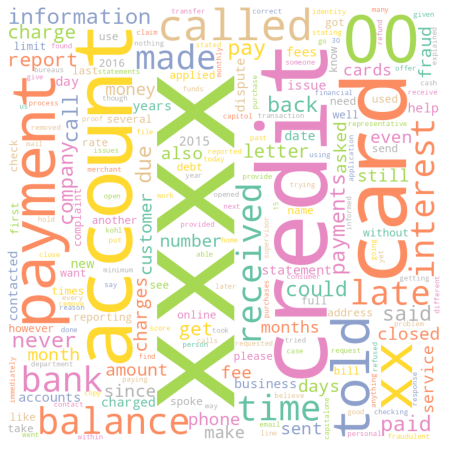

In [9]:
#Initialize a wordcloud object
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',
                prefer_horizontal=0.9,  #How often a term is put horizontally. 
                colormap='Set2',                      
                min_font_size = 10,
                random_state = 2021)
wordcloud.generate_from_frequencies(frequencies=dictfreq) 
plt.figure(figsize = (8, 8)) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.show() 

More instruction on **wordcloud** library: https://amueller.github.io/word_cloud/

For more options of colormap: https://matplotlib.org/stable/tutorials/colors/colormaps.html

We can also reshape a word cloud using the contour of a picture.

In [10]:
import numpy as np
from PIL import Image
#This traslates image to data array in RGB scales.
moneybag_mask = np.array(Image.open("classdata/money-bag.png")) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',
                prefer_horizontal=0.9,  
                colormap='Set2', 
                mask=moneybag_mask,
                contour_width=10,
                contour_color='purple',      
                min_font_size = 10,
                random_state = 2021)
wordcloud.generate_from_frequencies(frequencies=dictfreq) 
plt.figure(figsize = (5, 5)) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.show() 

NameError: name 'np' is not defined

## Two-Mode Text Network

In [17]:
#!pip3 install --upgrade textnets
#!pip3 install spacy
#!python3 -m spacy download en_core_web_sm
#!python3 -m spacy validate
#!pip3 install pycairo
#!pip3 install python-igraph

Let's take the example of a network where the first node set is words found in US newspaper headlines on the day of the first moon landing (July 20, 1969), and the second node set is the newspapers themselves. The data would look something like this:

In [18]:
import pandas as pd
from textnets import Corpus, Textnet
from textnets import examples
df=pd.DataFrame(examples.moon_landing)
df

,headlines
The Guardian,3:56 am: Man Steps On to the Moon
New York Times,"Men Walk on Moon -- Astronauts Land on Plain, ..."
Boston Globe,Man Walks on Moon
Houston Chronicle,"Armstrong and Aldrich ""Take One Small Step for..."
Washington Post,The Eagle Has Landed -- Two Men Walk on the Moon
Chicago Tribune,Giant Leap for Mankind -- Armstrong Takes 1st ...
Los Angeles Times,"Walk on Moon -- That's One Small Step for Man,..."


In text mining, a collection of document is also called a **corpus**. We need to turn the column "headlines" into a corpus object and do tokenization using textnet. In fact, textnet use **spacy** library (not NLTK) to tokenize the document. The row index of **df** will be used as the labels of the document nodes in the network.

In [19]:
corpus = Corpus(df["headlines"])
corpus.tokenized()

,term,n,term_weight
label,,,
Boston Globe,man,1,0.146128
Houston Chronicle,man,1,0.146128
Los Angeles Times,man,1,0.146128
New York Times,man,1,0.146128
The Guardian,man,1,0.146128
Boston Globe,moon,1,0.000000
Chicago Tribune,moon,1,0.000000
Houston Chronicle,moon,1,0.000000
Los Angeles Times,moon,1,0.000000


More arguments of **tokenized()**, such as "remove_stop_words" and "stem", can be found: https://textnets.readthedocs.io/en/stable/reference.html?highlight=tokenized#textnets.corpus.Corpus.tokenized

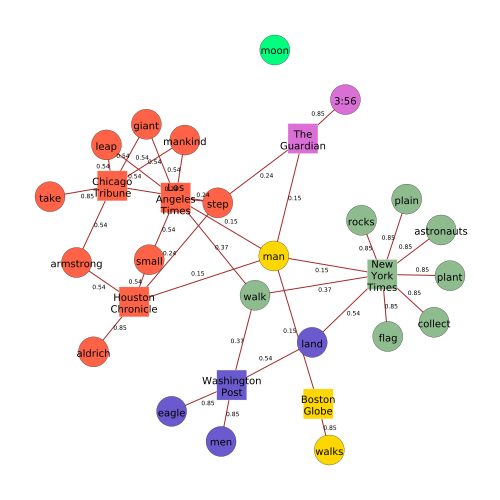

In [20]:
import random 
random.seed(2021) #Fix random seed for reproducibility
tn = Textnet(corpus.tokenized(), min_docs=1)
#min_docs is the minimum number of documents a term must appear 
#in to be included in the network (default: 2).
tn.plot(label_edges=True,   #Show or hide the edge weight (TFIDF)
        label_term_nodes=True,
        label_doc_nodes=True,
        show_clusters=False,  #Change to True if you are interested in clustering analysis.
        color_clusters=True,  #Change to True if you are interested in clustering analysis.
        bbox=[500,500],
        vertex_label_size=10,
        vertex_size=30,
        edge_width=1,
        edge_color="brown")

More options such as how to choose the colors, shapes, and sizes of the nodes can be found:
https://igraph.org/python/doc/tutorial/tutorial.html

## One-Mode Project Text Network

With some reshaping of the data, this two-mode network can be projected in either of its one-mode forms. That is, one can either create a network where newspapers are connected by their use of the same words, OR, words in all of the articles can be connected based upon their co-appearance in newspapers.

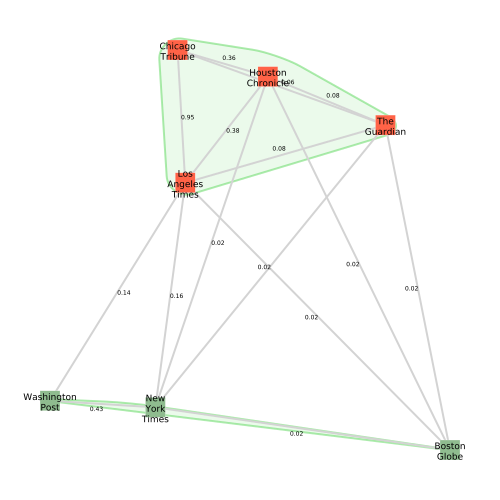

In [21]:
random.seed(2021)
papers = tn.project(node_type='doc')
papers.plot(label_nodes=True,   #Show or hide the node's label
            label_edges=True,   #Show or hide the edge weight
            show_clusters=True,
            color_clusters=True,
            bbox=[500,500])

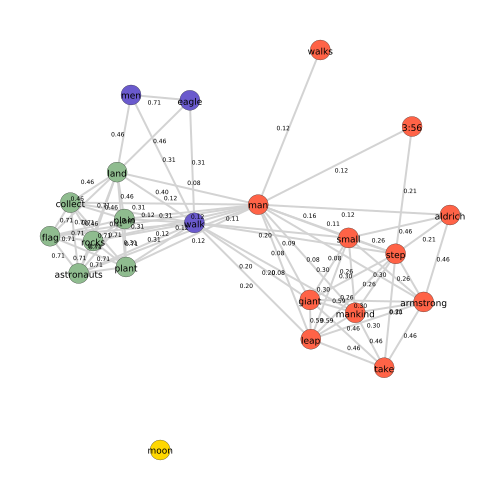

In [22]:
random.seed(2021)
words = tn.project(node_type='term')
words.plot(label_nodes=True,   #Show or hide the node's label
           label_edges=True,   #Show or hide the edge weight
           show_clusters=False,
           color_clusters=True,
           bbox=[500,500])

## Score of Betweenness

Each node (either words or documents) has a score of "cultural betweenness", which represents the extent to which a given document or word is between clusters. 

Roughly speaking, "betweenness" score is large if the node is connected to many nodes from many different clusters.

A node with a high betweeness is the "hub" of the network, showing what is in common between clusters.

In the code below, we filter node labels, labeling only those nodes that have a betweenness score above the median. This is particularly useful in high-order graphs where labeling every single node would cause too much visual clutter. 

Moreover, we resize the nodes according to their betweenness scores.

In [23]:
#Here is how to access the betweenness scores of the terms
words = tn.project(node_type='term')
words.betweenness

3:56           0.000000
aldrich        0.000000
armstrong      3.250000
astronauts     0.000000
collect        0.000000
eagle          0.000000
flag           0.000000
giant          6.583333
land          12.000000
leap           6.583333
man           26.000000
mankind        6.583333
men            0.000000
moon           0.000000
plain          0.000000
plant          0.000000
rocks          0.000000
small         14.000000
step          10.000000
take           0.000000
walk          78.000000
walks          0.000000
dtype: float64

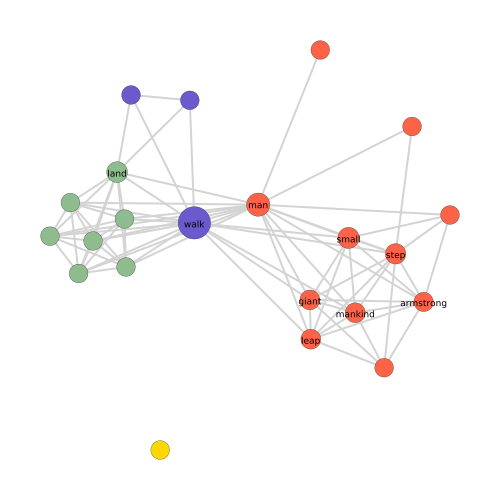

In [24]:
random.seed(2021)
words.plot(label_nodes=True,
           scale_nodes_by='betweenness', #resize the nodes according to betweenness scores. 
           color_clusters=True,
           bbox=[500,500],
           node_label_filter=lambda n: n.betweenness() > words.betweenness.median())

## A Real-World Example

The csv file **EightProducts.csv** contains about 400 amazon reviews on eight different electronic products. Let's use text network to analyze the relationships between keywords, reviews, and products. 

In [25]:
import pandas as pd
import random
df = pd.read_csv("classdata/EightProducts.csv")
df.head()

,Product,Review
0,Apex AD2600 Progressive-scan DVD player,troubleshooting ad-2500 and ad-2600 no pictur...
1,Apex AD2600 Progressive-scan DVD player,incredibe price / performance . \n i 've owne...
2,Apex AD2600 Progressive-scan DVD player,"doesnt play new disney movies . \nplay , disn..."
3,Apex AD2600 Progressive-scan DVD player,poor quality - problem with dual-layer dvd 's...
4,Apex AD2600 Progressive-scan DVD player,has destroyed several of my dvds and cds . \n...


This time, we directly create a corpus object from the csv file. To do so, we need to indicate which column contains the text and which column has the group labels for the documents. 

In [26]:
from textnets import Corpus, Textnet
from textnets import examples
corpus = Corpus.from_csv("classdata/EightProducts.csv", 
                         doc_col='Review',
                         label_col='Product')

In [27]:
corpus.tokenized()[corpus.tokenized().n>=80]

,term,n,term_weight
label,,,
Apex AD2600 Progressive-scan DVD player,apex,109,2.743069
Creative Labs Nomad Jukebox Zen Xtra 40GB,battery,141,0.000000
MicroMP3,battery,97,0.000000
Creative Labs Nomad Jukebox Zen Xtra 40GB,buy,95,0.000000
Creative Labs Nomad Jukebox Zen Xtra 40GB,cd,95,0.896384
Apex AD2600 Progressive-scan DVD player,dvd,226,2.019374
Creative Labs Nomad Jukebox Zen Xtra 40GB,easy,85,0.000000
Creative Labs Nomad Jukebox Zen Xtra 40GB,file,88,0.000000
Creative Labs Nomad Jukebox Zen Xtra 40GB,good,122,0.000000


Because the dataset is large and textnet is not a memory-efficient library, we only use the relatively frequent terms to build the text network.  Moreover, we only inlcude the terms whose weights are positive. See the two boolean conditions we use below.

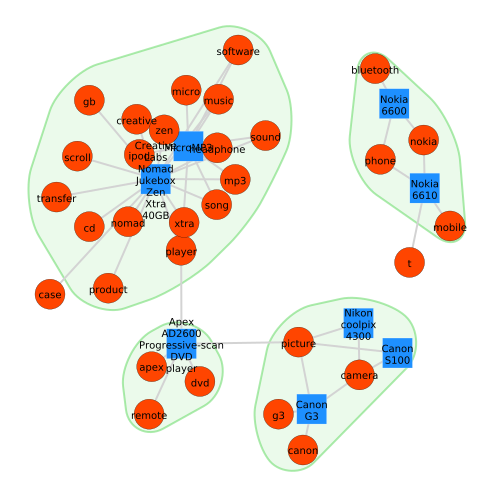

In [28]:
random.seed(2021)
tn = Textnet(corpus.tokenized()[(corpus.tokenized().n>=50) & (corpus.tokenized().term_weight>0)], min_docs=1)
tn.plot(label_term_nodes=True,
        label_doc_nodes=True,
        show_clusters=True, 
        vertex_size=30,
        vertex_label_size=10,
        bbox=[500,500])

The one-mode projected network with the nodes of documents (groups).

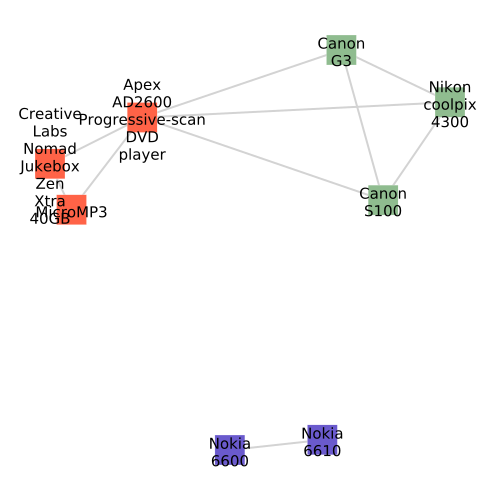

In [29]:
random.seed(2021)
papers = tn.project(node_type='doc')
papers.plot(label_nodes=True,
            color_clusters=True,
            show_clusters=False,
            vertex_size=30,
            vertex_label_size=15,
            bbox=[500,500])

The one-mode projected network with the nodes of words.

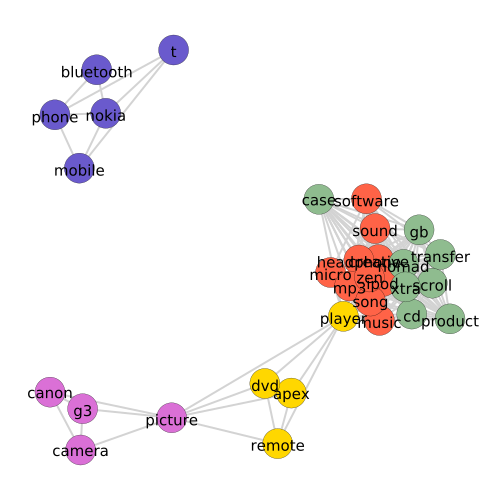

In [30]:
random.seed(2021)
papers = tn.project(node_type='term')
papers.plot(label_nodes=True,
            color_clusters=True,
            show_clusters=False,
            vertex_size=30,
            vertex_label_size=15,
            bbox=[500,500])